# Linear Regression

Let us try Linear Regression on our Bakery Sales data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# Global plot settings
plt.rcParams['figure.dpi'] = 150   # Set the resolution of the plots to 150 DPI
plt.style.use('fivethirtyeight')

Read the data

In [18]:
df_sales = pd.read_csv("/workspaces/bakery_prediction/2_BaselineModel/split_data/train_data.csv", encoding = "utf-8")

In [19]:
df_sales.head()

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Woche,Monat,Wochentag,Feiertag,Jahreszeit,Ferien,sunny,cloudy,rainy,thunderstorm
0,1307011,2013-07-01,1,148.828353,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
1,1307012,2013-07-01,2,535.856285,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
2,1307013,2013-07-01,3,201.198426,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
3,1307014,2013-07-01,4,65.890169,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
4,1307015,2013-07-01,5,317.475875,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0


See the data types 

In [28]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7493 entries, 0 to 7492
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   7493 non-null   int64         
 1   Datum                7493 non-null   datetime64[ns]
 2   Warengruppe          7493 non-null   int64         
 3   Umsatz               7493 non-null   float64       
 4   KielerWoche          7493 non-null   int64         
 5   Bewoelkung           7493 non-null   int64         
 6   Temperatur           7493 non-null   float64       
 7   Windgeschwindigkeit  7493 non-null   int64         
 8   Woche                7493 non-null   int64         
 9   Monat                7493 non-null   int64         
 10  Wochentag            7493 non-null   int64         
 11  Feiertag             7493 non-null   int64         
 12  Jahreszeit           7493 non-null   int64         
 13  Ferien               7493 non-nul

In [27]:
# change dattum format to datetime
df_sales['Datum'] = pd.to_datetime(df_sales['Datum'], format='%Y-%m-%d')


Let us select the numerical features 

In [29]:
# The filtered data with only numerical features
df_num_feature = df_sales.select_dtypes(include=[np.number])

Visulaizing pairplot is time consuming so commented

In [22]:
#plt.figure(figsize=(8,8))

#sns.pairplot(df_num_feature)

#plt.show()

Viewing the correlation

In [30]:
df_num_feature.corr()

,id,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Woche,Monat,Wochentag,Feiertag,Jahreszeit,Ferien,sunny,cloudy,rainy,thunderstorm
id,1.000000,-0.025232,-0.097412,0.059476,0.041661,-0.096006,0.026897,-0.314629,-0.319115,0.004662,0.022876,-0.295053,-0.022529,0.103932,0.041003,-0.115167,0.047491
Warengruppe,-0.025232,1.000000,-0.060014,-0.010328,0.021994,-0.047789,-0.008186,0.079732,0.080009,0.000858,-0.006285,0.059120,-0.023501,-0.005403,0.001569,0.002558,-0.002798
Umsatz,-0.097412,-0.060014,1.000000,0.053619,-0.085912,0.216493,0.011477,0.001017,0.015637,0.134691,0.047734,0.016861,0.161020,0.011844,-0.025471,0.010692,0.025015
KielerWoche,0.059476,-0.010328,0.053619,1.000000,0.002325,0.145778,0.001032,-0.019269,-0.029506,0.043155,-0.016709,0.014664,-0.097921,0.002208,-0.037048,0.003273,0.125229
Bewoelkung,0.041661,0.021994,-0.085912,0.002325,1.000000,-0.376563,0.043300,0.018603,0.014753,-0.010421,-0.065129,-0.012279,-0.019757,-0.230590,-0.010078,0.147568,0.022901
Temperatur,-0.096006,-0.047789,0.216493,0.145778,-0.376563,1.000000,0.003135,0.218965,0.221654,0.021381,0.023979,0.297911,0.194750,0.084821,-0.161472,0.078491,0.089681
Windgeschwindigkeit,0.026897,-0.008186,0.011477,0.001032,0.043300,0.003135,1.000000,-0.108922,-0.115052,0.002965,0.020486,-0.139483,0.040594,-0.045551,-0.056215,0.075507,0.025349
Woche,-0.314629,0.079732,0.001017,-0.019269,0.018603,0.218965,-0.108922,1.000000,0.972987,-0.006223,-0.022315,0.869609,0.005874,-0.015137,-0.057711,0.056969,0.029532
Monat,-0.319115,0.080009,0.015637,-0.029506,0.014753,0.221654,-0.115052,0.972987,1.000000,-0.004540,-0.020261,0.864699,0.000559,-0.020635,-0.055681,0.058391,0.029849
Wochentag,0.004662,0.000858,0.134691,0.043155,-0.010421,0.021381,0.002965,-0.006223,-0.004540,1.000000,-0.065520,0.004952,-0.058849,-0.012947,-0.002406,0.015947,-0.023016


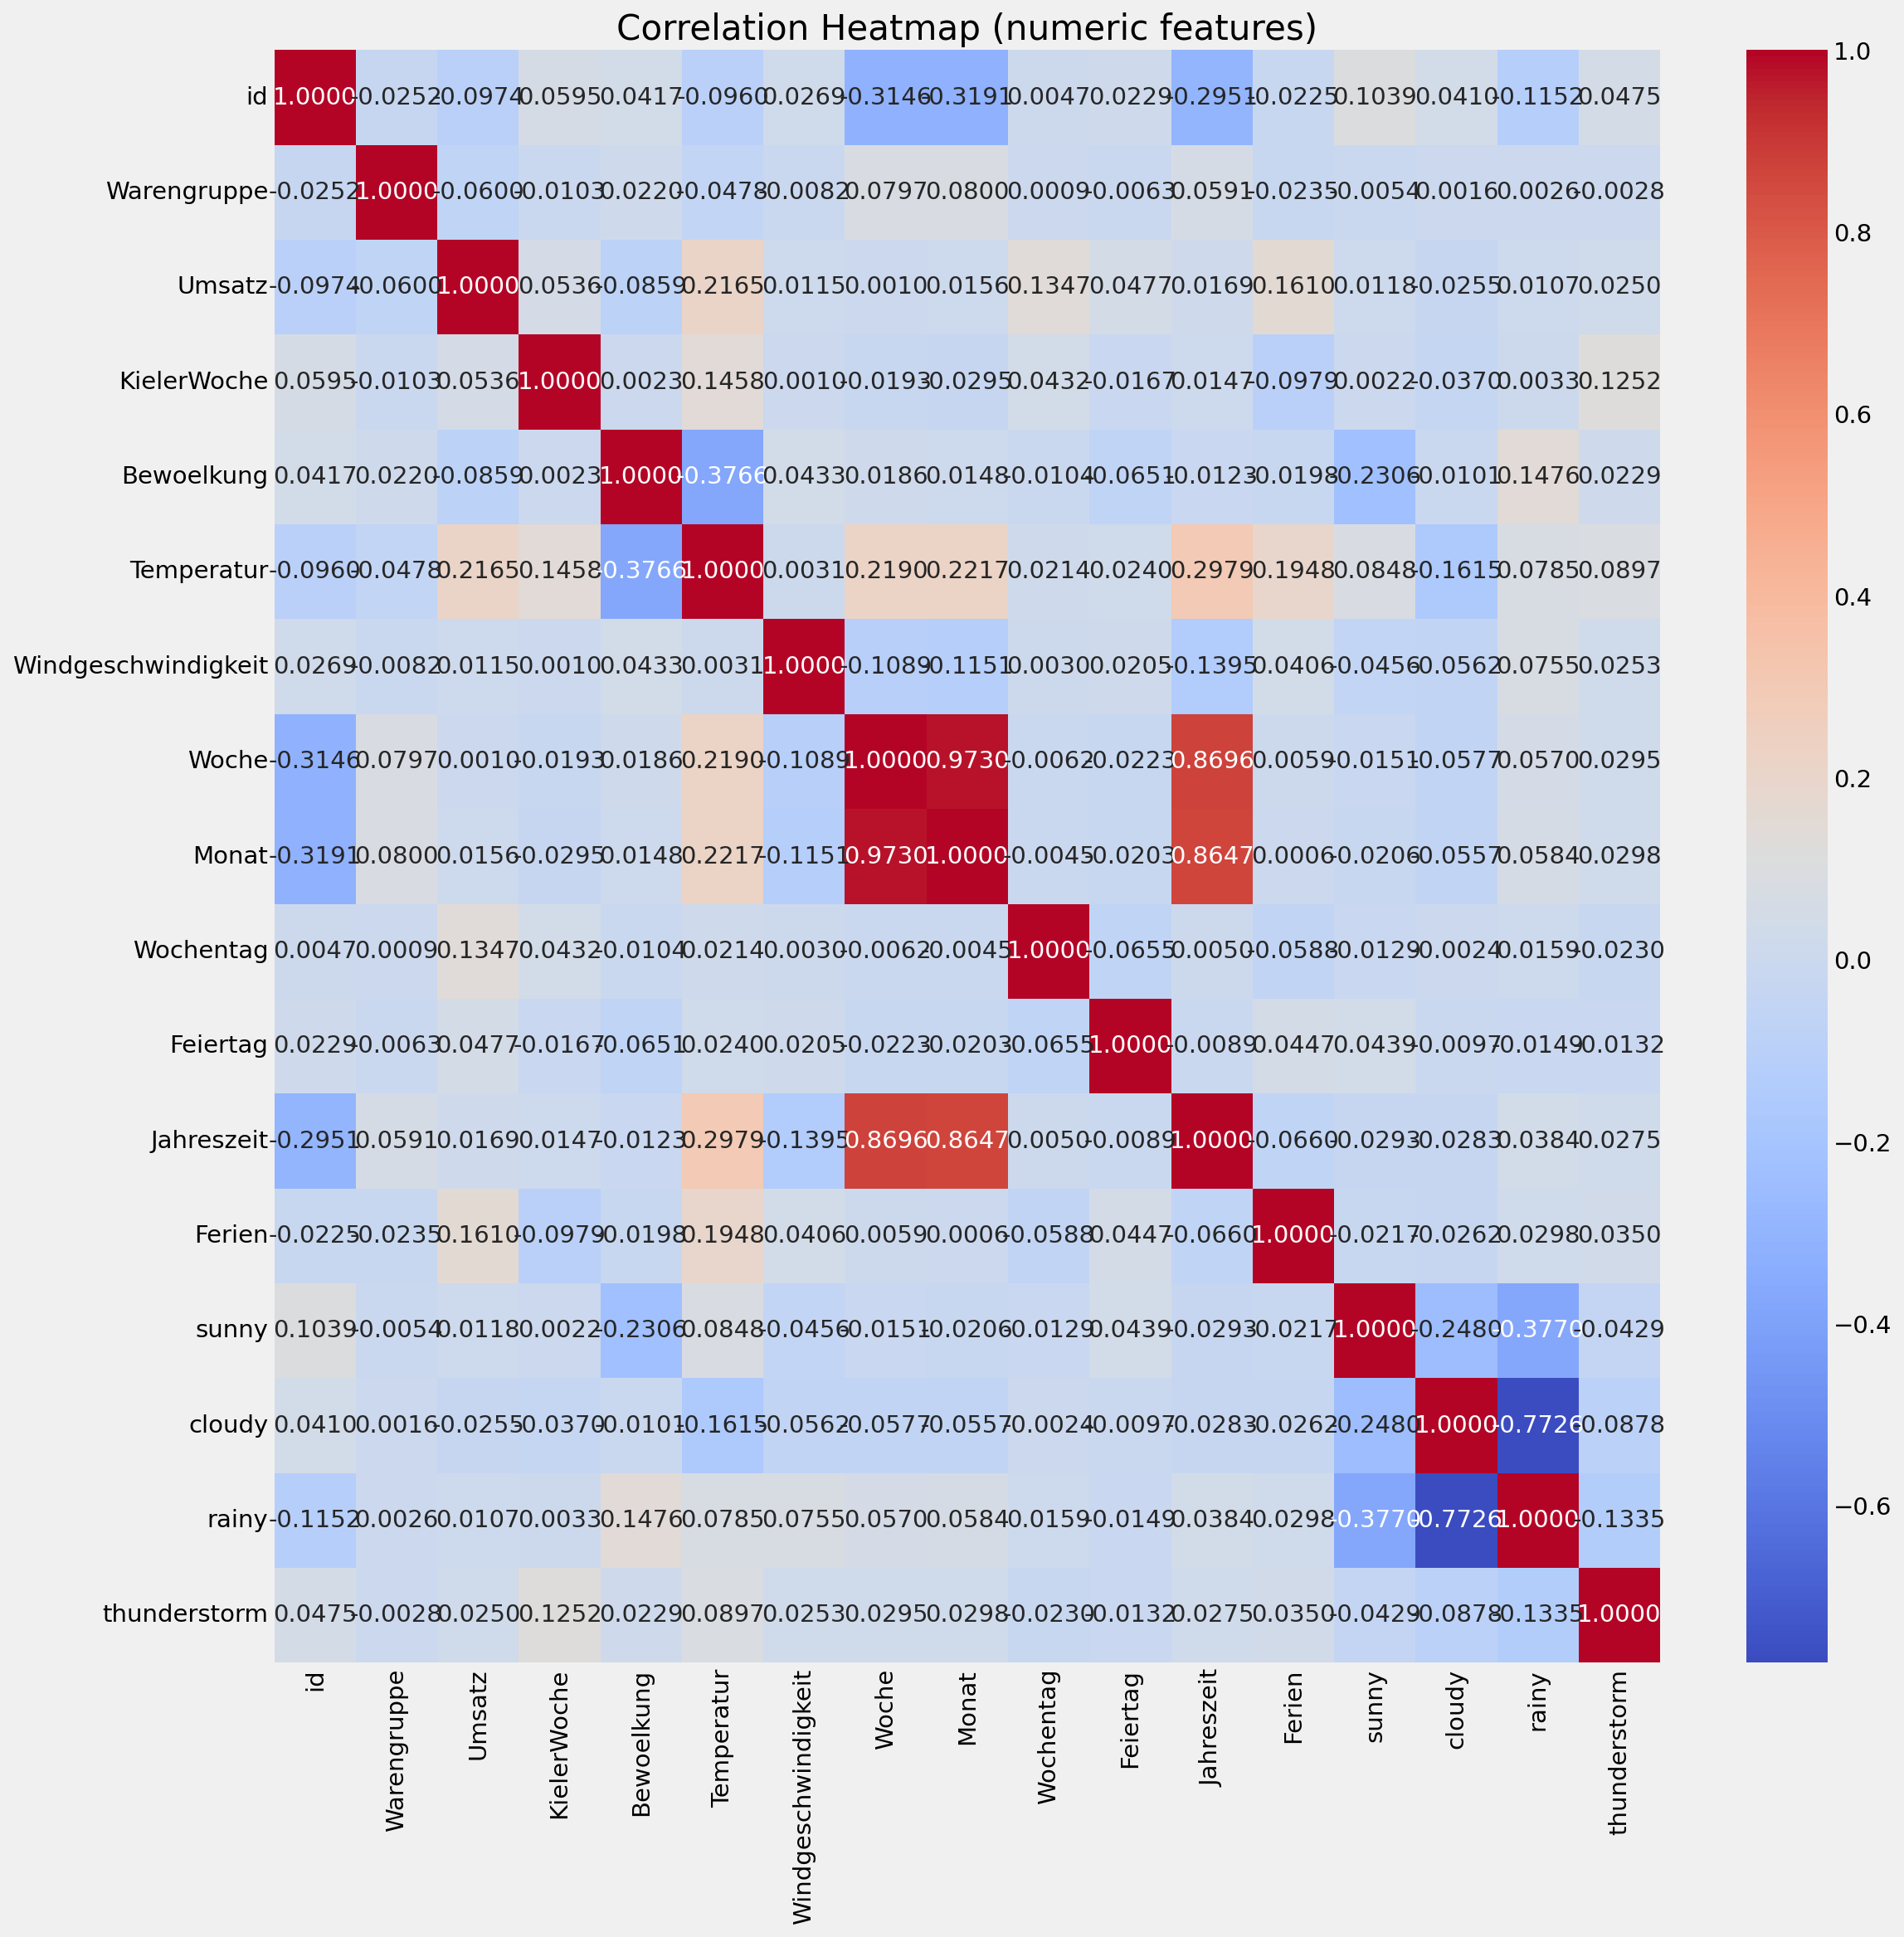

In [31]:
correlation_matrix = df_num_feature.corr()

plt.figure(figsize=(16,16))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='coolwarm')
plt.title("Correlation Heatmap (numeric features)")
plt.show()

So , with the current pre-processed data, our dependent variable (Target) , i.e. Umsatz (Revenue) has decent (more than 10%) correlation with 

- Temperature (~0.21)
- Wochentag (~0.13) 
- Ferien (~0.16) aka School Holiday


The following code snippet is similar to tasks done in *DeepLearningAI Course* reference materials

In [25]:
# we will use the Temperature, Wochentag, Ferien and wettercode as features to predict the sales
predictors = ['Temperatur', 'Wochentag', 'Ferien']

# get the dummy variables for the Wettercode column
features_with_dummies = pd.get_dummies(df_sales[predictors], drop_first=True, dtype=int)

features_with_dummies.head()

,Temperatur,Wochentag,Ferien
0,17.8375,1,0
1,17.8375,1,0
2,17.8375,1,0
3,17.8375,1,0
4,17.8375,1,0


In [26]:
# add the constant term
X = sm.add_constant(features_with_dummies)

# get the target variable
Y = df_sales["Umsatz"]

# create the model
model = sm.OLS(Y, X)

# fit the model
results = model.fit()

# print the model summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     219.0
Date:                Wed, 26 Nov 2025   Prob (F-statistic):          3.63e-136
Time:                        16:19:40   Log-Likelihood:                -47749.
No. Observations:                7493   AIC:                         9.551e+04
Df Residuals:                    7489   BIC:                         9.553e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.6060      4.619     23.515      0.0

# ToDo

Add initial analysis -


In [ ]:
#predict the sales for test data
test_data = pd.read_csv("/workspaces/bakery_prediction/2_BaselineModel/split_data/test_data.csv", encoding = "utf-8")
test_data['Datum'] = pd.to_datetime(test_data['Datum'], format='%Y-%m-%d')
